<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Classification_OS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV


#Load data

In [3]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2_without_nan_OS.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [91]:
df_train.shape

(130, 112)

In [0]:
public_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
PA_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
public_labels = df_train.Overall_Stage

In [0]:
PA_labels = df_test.Overall_Stage

In [96]:
public_data.columns

Index(['VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength', 'Elongation', 'SurfaceVolumeRatio',
       'Maximum2DDiameterSlice', 'Flatness',
       ...
       'HighGrayLevelZoneEmphasis', 'SmallAreaEmphasis',
       'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast.1', 'Busyness'],
      dtype='object', length=107)

#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(public_data, public_labels, test_size=0.3, stratify=public_labels, random_state=3)

In [99]:
X_train.shape

(91, 107)

#Vettorizzare i label

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(y_train)
test_labels_encoded = encoder.transform(y_test)

#Scalers

In [0]:
#Scalers

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scalers_to_test = [StandardScaler(), RobustScaler(), MinMaxScaler(), None]


#DecisionTreeClassifier 

In [0]:
from sklearn.tree import DecisionTreeClassifier 

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', LinearDiscriminantAnalysis()), ('clf', DecisionTreeClassifier())]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
n_features_to_test = np.arange(1, 11)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[LinearDiscriminantAnalysis()], 'red_dim__n_components':[2], 'clf__criterion':['gini', 'entropy']},
               {'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':n_features_to_test, 'clf__criterion':['gini', 'entropy']}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=3, verbose=1)

In [110]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 264 out of 264 | elapsed:    4.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('red_dim',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                                                                   tol=0.0001)),
                                       ('clf',
                                        DecisionTreeClassifi

In [111]:
print(f'score = {grid.score(X_test, y_test)}')

score = 0.28205128205128205


In [112]:
print(grid.best_params_)

{'clf__criterion': 'gini', 'red_dim': PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 9, 'scaler': None}


##Learning curve

NameError: ignored

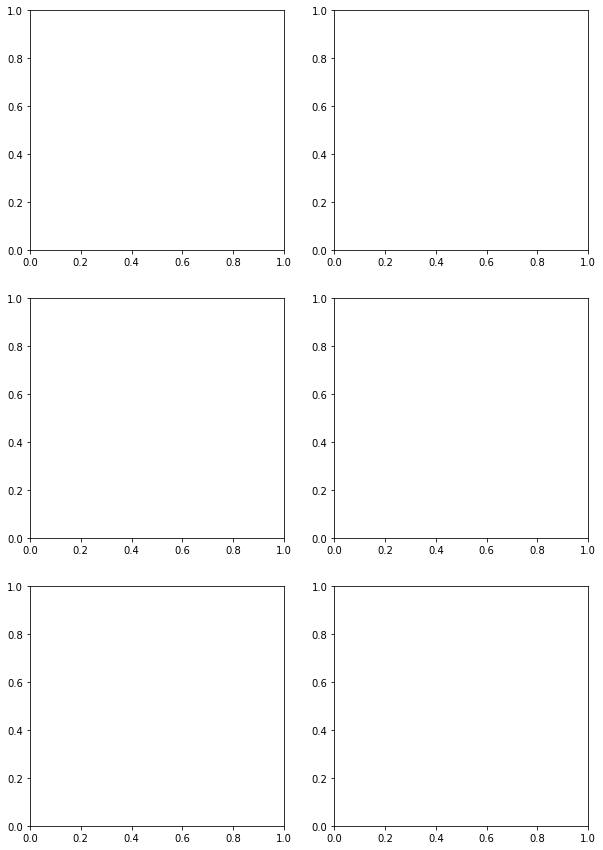

In [113]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (RandomForestClassifier)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

#SVM rbf 

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', SVC(kernel='rbf', random_state=7007))]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
# Designate distributions to sample hyperparameters from 
np.random.seed(123)
g_range = np.random.uniform(0.0, 10, 50).astype(float)
C_range = np.random.normal(0, 10, 50 ).astype(float)

C_r = np.arange(0.2, 5, 0.2)
n = np.arange(4, 10)

# Check that gamma>0 and C>0 
C_range[C_range < 0] = 0.0001

In [0]:
#a =  np.arange(-15, 4, 2)
#g_range = np.exp2(a)

#b = np.arange(-5, 16, 2)
#C_range = np.exp2(b)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':[n],'clf__C':list(C_range), 'clf__gamma':list(g_range)}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=10, n_jobs=-1, scoring='accuracy')
#per questo usare parentesi tonde per i kernel

In [121]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1839s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0300s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1036s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1921s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 682 t

ValueError: ignored

In [123]:
print(f'score = {grid.score(X_test, y_test)}')

AttributeError: ignored

In [0]:
print(grid.best_params_)

{'clf__C': 9.787360059373466, 'clf__gamma': 6.964691855978616, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 7, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [0]:
C_range

array([3.1250e-02, 1.2500e-01, 5.0000e-01, 2.0000e+00, 8.0000e+00,
       3.2000e+01, 1.2800e+02, 5.1200e+02, 2.0480e+03, 8.1920e+03,
       3.2768e+04])

##Learning curve

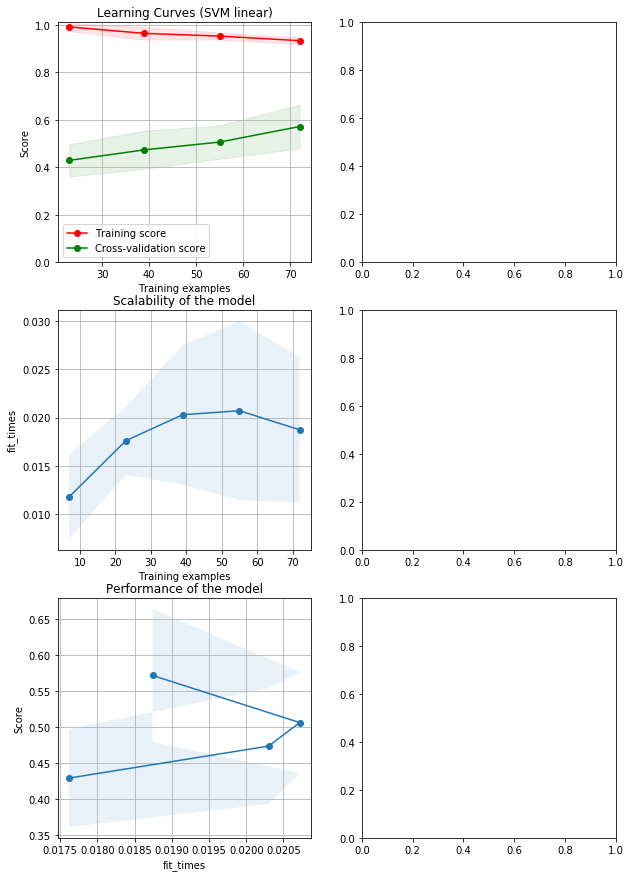

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (SVM rbf)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()